In [1]:
import tensorflow as tf
import numpy  as np
import matplotlib.pyplot as plt

In [2]:
from keras import layers, models

In [3]:
# Load the MNIST dataset
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
Y_train.shape

(60000,)

In [7]:
# Normalize the pixel values to the range 0-1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Flatten the 28x28 images into 784-dimensional vectors
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Convert labels to one-hot encoding
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)

In [8]:
X_train.shape

# before it was 28 x 28 which comes out to be 784, now it is sequentially arranged.

(60000, 784)

In [9]:
Y_train.shape

(60000, 10)

In [10]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [11]:
# build nueral network model

from keras import Input, Sequential
from keras.layers import Dense


model = Sequential([
    Input(shape=(784,)),  # Define the input shape using the Input layer
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Train the model

model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 713us/step - accuracy: 0.8745 - loss: 0.4416 - val_accuracy: 0.9577 - val_loss: 0.1407
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - accuracy: 0.9641 - loss: 0.1199 - val_accuracy: 0.9692 - val_loss: 0.1023
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 620us/step - accuracy: 0.9779 - loss: 0.0762 - val_accuracy: 0.9741 - val_loss: 0.0833
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.9832 - loss: 0.0560 - val_accuracy: 0.9767 - val_loss: 0.0745
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 652us/step - accuracy: 0.9875 - loss: 0.0431 - val_accuracy: 0.9754 - val_loss: 0.0748
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 650us/step - accuracy: 0.9902 - loss: 0.0334 - val_accuracy: 0.9787 - val_loss: 0.0682
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 628us/step - accuracy: 0.9922 - loss: 0.0255 - val_accuracy: 0.9770 - val_loss: 0.0710
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.9933 -

In [14]:
# evaluate the model

test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 0s - 360us/step - accuracy: 0.9770 - loss: 0.0859

Test accuracy: 0.9769999980926514


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
Predicted Label: 7, True Label: 7


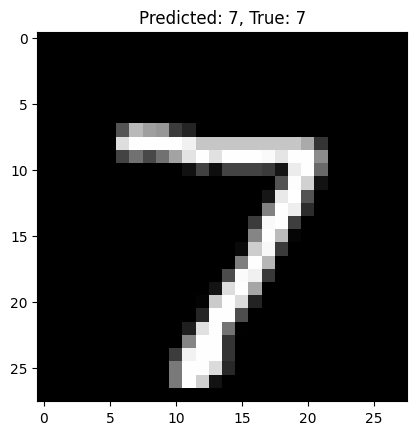

In [15]:
predictions = model.predict(X_test)

# Get the predicted class for the first image in the test set
predicted_label = np.argmax(predictions[0])
true_label = np.argmax(Y_test[0])

print(f'Predicted Label: {predicted_label}, True Label: {true_label}')

# Visualize the first image in the test set
current_image = X_test[0].reshape(28, 28) * 255
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.title(f'Predicted: {predicted_label}, True: {true_label}')
plt.show()
